In [1]:
#1、导入数据集

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
data = load_wine()
data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
#2、探索数据

In [3]:
import pandas as pd
import numpy as np

In [8]:
new_data = pd.concat([pd.DataFrame(data.data),pd.DataFrame(data.target)],axis=1)

In [10]:
feature_name = data.feature_names

In [11]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
#3、测试集和训练集

In [12]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2)

In [45]:
#4、建模训练

In [71]:
clf = tree.DecisionTreeClassifier(criterion='gini'
                                 ,random_state=200
                                 # ,splitter='random'
                                  , max_depth = 3
                                 # ,min_samples_split=25
                                 # ,min_samples_leaf=10,
                                 )
clf = clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
score

0.86111111111111116

In [23]:
#5、可视化决策树

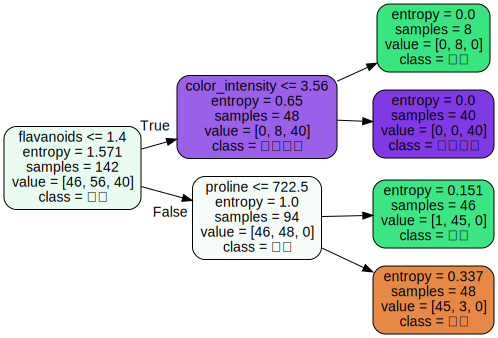

In [63]:
import graphviz
dot_data = tree.export_graphviz(clf
                                , out_file=None
                                , max_depth=None
                                , feature_names=data.feature_names
                                , class_names=['琴酒','雪梨','贝尔摩德']
                                #, label='all'
                                , filled=True
                                , leaves_parallel=False
                                , impurity=True
                                , node_ids=False
                                , proportion=False
                                , rotate=1
                                , rounded=True
                                , special_characters=False
                                , precision=3
                                )
graph = graphviz.Source(dot_data)
graph

In [56]:
#6、探索决策树

In [64]:
clf.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.48972465,  0.        ,  0.        ,  0.15604372,
        0.        ,  0.        ,  0.35423163])

In [65]:
[*zip(feature_name,clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.48972464731506116),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.15604372291806853),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.35423162976687023)]

In [61]:
score_train= clf.score(X_train, y_train)
score_train

1.0

In [71]:
#确定最优剪枝参数

0.916666666667


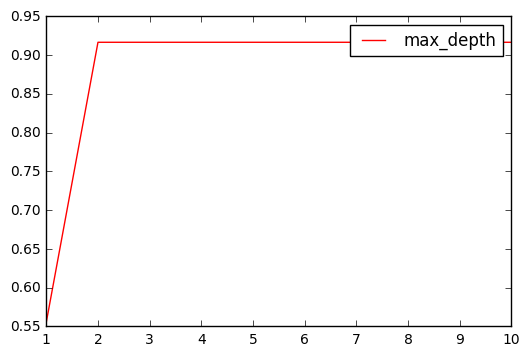

In [66]:
import matplotlib.pyplot as plt
test= []
for i in range(10):
    clf= tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    #,splitter="random"
                                    )
    clf= clf.fit(X_train, y_train)
    score= clf.score(X_test, y_test)
    test.append(score)
print(score.max())
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [80]:
#重要的属性和接口

In [82]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(X_test)

array([ 8, 14, 14, 14,  4,  8,  8,  2, 14, 14,  4, 14, 14,  2,  8,  2, 14,
        2,  2, 10,  8, 14,  8,  8,  8,  4, 14,  2,  8, 14, 13,  8, 14,  8,
       14, 14], dtype=int64)

In [68]:
#predict返回每个测试样本的分类/回归结果
y_pre = clf.predict(X_test)   #这些特征的输入最少是二维的，如果特征只有一个样本我们用reshape(1,-1)增维

In [69]:
y_pre == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True], dtype=bool)